## Regression Assignment: Predicting CO2 Emissions Using Other Variables (for a given year)

Let's now try to build a regression model to predict CO2 emissions using other variables (for any given year). This will help us in understanding which variables affect CO2 emissions. This understanding can then be used by, for example, organisations/authorities such as the UN, governments etc. to create regulatory policies etc.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# total co2 emissions of various countries (for a given year)
# note that this is co2 emissions per person (tonnes per person) for a given year
year = "2014"
total_co2 = pd.read_csv("yearly_co2_emissions_1000_tonnes.csv")
total_co2 = total_co2[["geo", year]]
total_co2.columns = ["geo", "co2"]
print(total_co2.shape)
total_co2.head()

(192, 2)


,geo,co2
0,Afghanistan,9810.0
1,Albania,5720.0
2,Algeria,145000.0
3,Andorra,462.0
4,Angola,34800.0


In [3]:
# median value
median_co2 = total_co2["co2"].median()
median_co2

11300.0

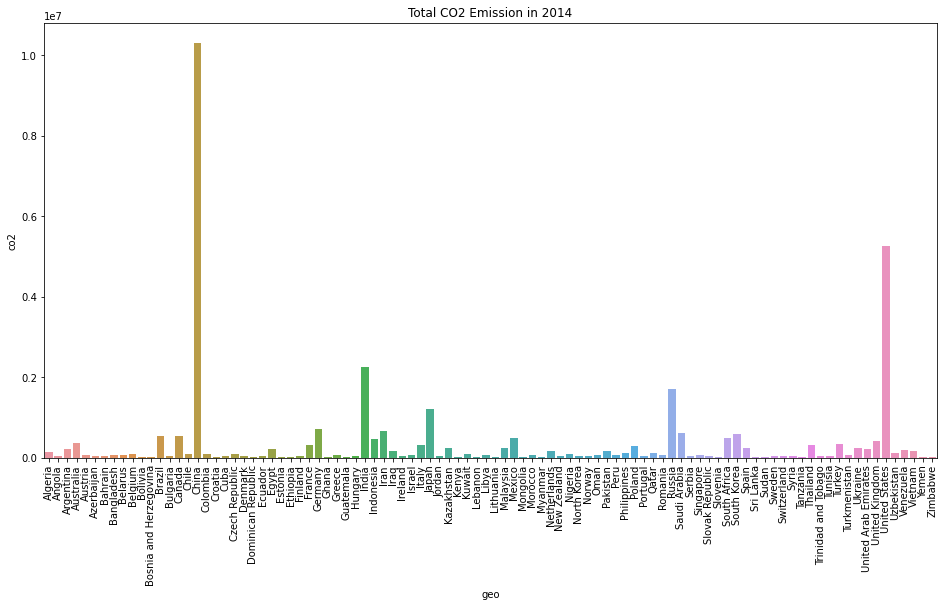

In [4]:
# plot co2 emissions by country
total_co2 = total_co2[total_co2["co2"] > median_co2]
plt.figure(figsize=(16, 8))
sns.barplot(x="geo", y="co2", data=total_co2)
plt.title("Total CO2 Emission in {}".format(year))
plt.xticks(rotation=90)
plt.show()

The top three countries in terms of total CO2 emissions are China, the US, and India. If this makes you think that these three countries are the main culprits in global warming, think again. What we've plotted above is the total CO2 emissions, which will be high for countries with higher populations. 

A better variable to consider is the CO2 emission *per capita*.

In [5]:
# co2 emissions per capita
# this is co2 emissions per person (tonnes per person) for a given year
co2 = pd.read_csv("co2_emissions_tonnes_per_person.csv")
co2 = co2[["geo", year]]
co2.columns = ["geo", "co2"]
co2.head()

,geo,co2
0,Afghanistan,0.299
1,Albania,1.960
2,Algeria,3.720
3,Andorra,5.830
4,Angola,1.290


In [6]:
# median value
median_per_capita_co2 = co2["co2"].median()
median_per_capita_co2

2.2649999999999997

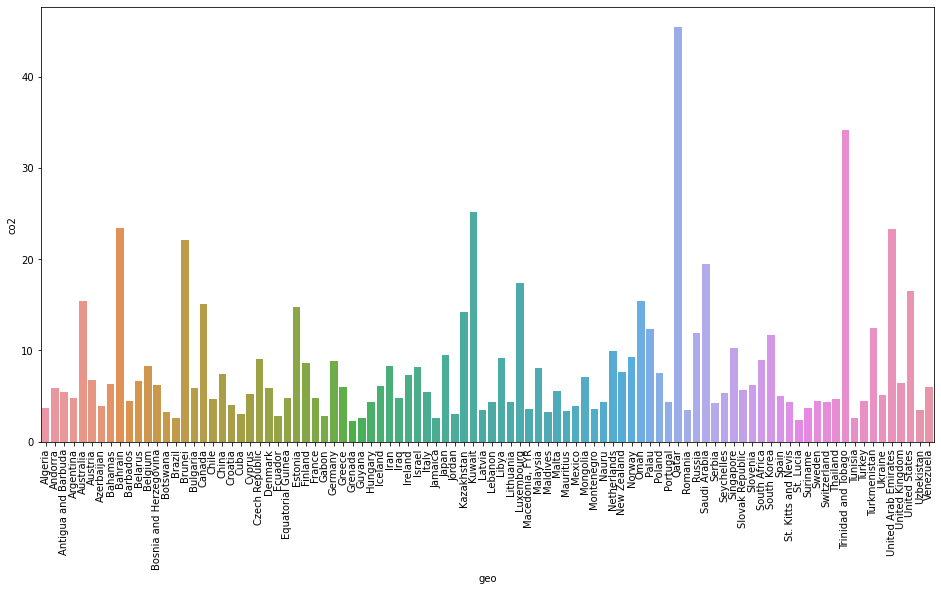

In [7]:
# plot per capita co2 emissions
co2 = co2[co2["co2"] > median_per_capita_co2]
plt.figure(figsize=(16, 8))
sns.barplot(x="geo", y="co2", data=co2)
plt.xticks(rotation=90)
plt.show()

In [8]:
# income 
income = pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
income = income[["geo", year]]
income.columns = ["geo", "income"]
income.head()

,geo,income
0,Afghanistan,1780
1,Albania,10700
2,Algeria,13500
3,Andorra,44900
4,Angola,6260


In [9]:
# merge with co2 df
df = pd.merge(co2, income, on='geo', how='inner')
df.head()

,geo,co2,income
0,Algeria,3.72,13500
1,Andorra,5.83,44900
2,Antigua and Barbuda,5.38,19500
3,Argentina,4.75,18800
4,Australia,15.40,43400


Text(0, 0.5, 'co2')

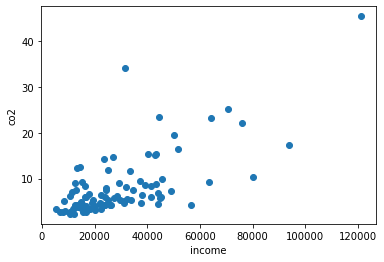

In [10]:
# plot per capita income and co2
plt.scatter(df['income'], df['co2'])
plt.xlabel('income')
plt.ylabel('co2')

In [11]:
# forest
forest = pd.read_csv("forest_coverage_percent.csv")
forest = forest[["geo", year]]
forest.columns = ["geo", "forest"]
forest.head()

,geo,forest
0,Afghanistan,2.07
1,Albania,28.20
2,Algeria,0.82
3,Andorra,34.00
4,Angola,46.50


In [12]:
# merge forest with the df above
df = pd.merge(df, forest, how="inner",
             left_on="geo", right_on="geo")
df.head()

,geo,co2,income,forest
0,Algeria,3.72,13500,0.82
1,Andorra,5.83,44900,34.00
2,Antigua and Barbuda,5.38,19500,22.30
3,Argentina,4.75,18800,10.00
4,Australia,15.40,43400,16.20


Text(0, 0.5, 'co2')

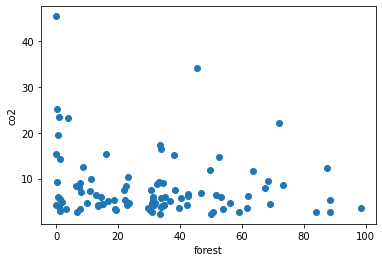

In [13]:
# plot forest and co2 
plt.scatter(df['forest'], df['co2'])
plt.xlabel('forest')
plt.ylabel('co2')

### Function to Read and Merge Files

In [14]:
# fn to read and merge dfs
import os
root_folder = "./"

def read_and_merge_files(root_folder, year="2010"):
    dfs = []
    for subdir, dirs, files in os.walk(root_folder):
        for file in files:
            filename,ext = file.split(".")
            if ext != 'ipynb' :
                print(filename)
                df = pd.read_csv(root_folder+str(file))
                # include only datasets having more than 50 countries' data
                if year in df.columns and df.shape[0] > 50: 
                    df = df[["geo", year]]
                    df.columns = ["geo", filename]
                    dfs.append(df)
    
    # merge all files using the key 'geo'
    master_df = dfs[0]
    for i in range(len(dfs)-1):
        master_df = pd.merge(master_df, dfs[i+1], how="inner", 
                             left_on="geo", right_on="geo")
    return master_df

In [15]:
master_df = read_and_merge_files(root_folder, year="2007")
master_df.head()

cars_trucks_and_buses_per_1000_persons
co2_emissions_tonnes_per_person
coal_consumption_per_cap
electricity_generation_per_person
electricity_use_per_person
forest_coverage_percent
hydro_power_generation_per_person
income_per_person_gdppercapita_ppp_inflation_adjusted
industry_percent_of_gdp
natural_gas_production_per_person
oil_consumption_per_cap
oil_production_per_person
yearly_co2_emissions_1000_tonnes


,geo,cars_trucks_and_buses_per_1000_persons,co2_emissions_tonnes_per_person,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,forest_coverage_percent,hydro_power_generation_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,industry_percent_of_gdp,oil_consumption_per_cap,yearly_co2_emissions_1000_tonnes
0,Algeria,NaN,3.19,0.02210,1090,891.0,0.71,0.00057,12600,57.7,0.376,109000.0
1,Argentina,314.0,4.38,0.03050,2880,2440.0,10.80,0.06630,17900,27.4,0.605,175000.0
2,Australia,653.0,17.80,2.51000,11600,11000.0,16.40,0.05810,40700,25.6,2.030,372000.0
3,Austria,557.0,8.39,0.47000,7800,8210.0,46.70,0.38400,43700,27.6,1.620,69700.0
4,Azerbaijan,NaN,3.50,0.00014,2500,2120.0,11.30,0.02300,13200,66.1,0.519,30500.0


In [16]:
# saving the merged dataset in a CSV file
master_df.to_csv("co2_prediction_dataset.csv", sep=',')

In [17]:
# plots
df = master_df.iloc[:, 1:]
print(df.shape)
df.head()

(56, 11)


,cars_trucks_and_buses_per_1000_persons,co2_emissions_tonnes_per_person,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,forest_coverage_percent,hydro_power_generation_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,industry_percent_of_gdp,oil_consumption_per_cap,yearly_co2_emissions_1000_tonnes
0,NaN,3.19,0.02210,1090,891.0,0.71,0.00057,12600,57.7,0.376,109000.0
1,314.0,4.38,0.03050,2880,2440.0,10.80,0.06630,17900,27.4,0.605,175000.0
2,653.0,17.80,2.51000,11600,11000.0,16.40,0.05810,40700,25.6,2.030,372000.0
3,557.0,8.39,0.47000,7800,8210.0,46.70,0.38400,43700,27.6,1.620,69700.0
4,NaN,3.50,0.00014,2500,2120.0,11.30,0.02300,13200,66.1,0.519,30500.0


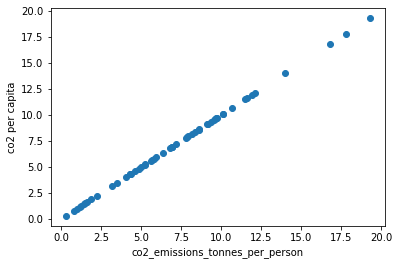

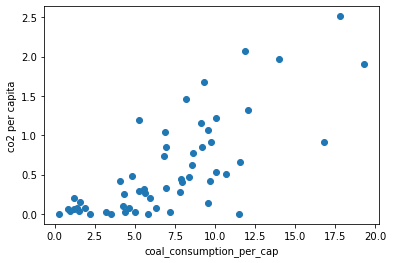

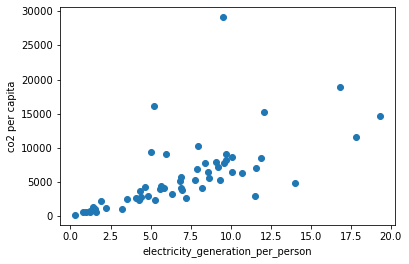

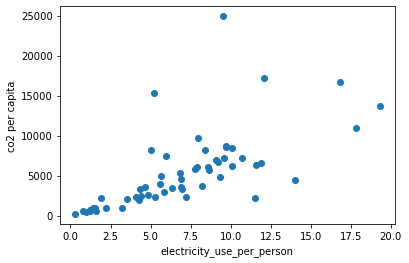

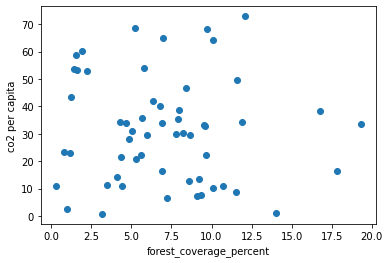

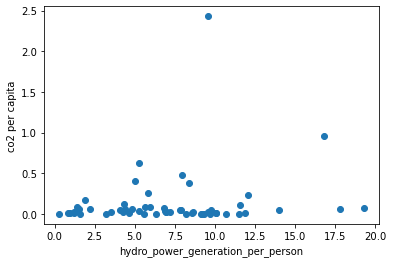

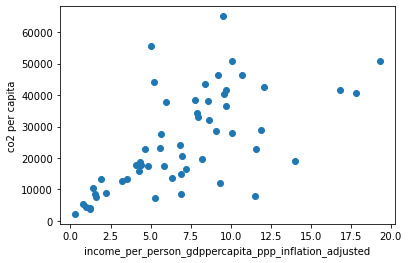

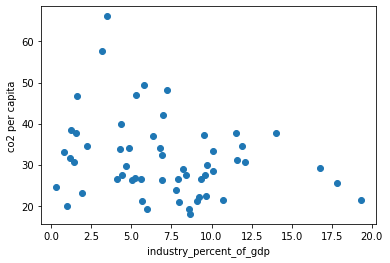

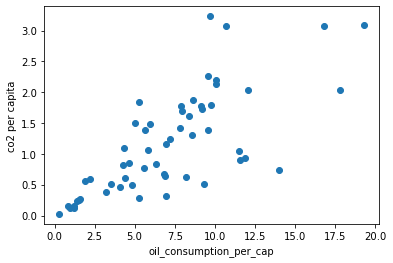

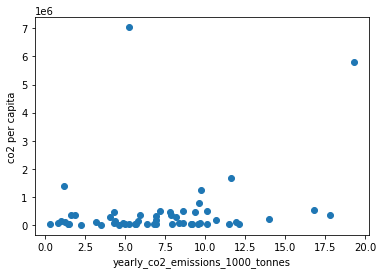

In [18]:
# plot CO2 with all other variables

plt.figure()
for col in range(1, df.shape[1]):
    plt.scatter(df["co2_emissions_tonnes_per_person"], df.iloc[:, col])
    plt.xlabel(df.columns[col])
    plt.ylabel("co2 per capita")
    plt.show()

## Regression

In [19]:
master_df = read_and_merge_files(root_folder, year="2007")
df = master_df.iloc[:, 1:]
print(df.shape)
df.head()

cars_trucks_and_buses_per_1000_persons
co2_emissions_tonnes_per_person
co2_prediction_dataset
coal_consumption_per_cap
electricity_generation_per_person
electricity_use_per_person
forest_coverage_percent
hydro_power_generation_per_person
income_per_person_gdppercapita_ppp_inflation_adjusted
industry_percent_of_gdp
natural_gas_production_per_person
oil_consumption_per_cap
oil_production_per_person
yearly_co2_emissions_1000_tonnes
(56, 11)


,cars_trucks_and_buses_per_1000_persons,co2_emissions_tonnes_per_person,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,forest_coverage_percent,hydro_power_generation_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,industry_percent_of_gdp,oil_consumption_per_cap,yearly_co2_emissions_1000_tonnes
0,NaN,3.19,0.02210,1090,891.0,0.71,0.00057,12600,57.7,0.376,109000.0
1,314.0,4.38,0.03050,2880,2440.0,10.80,0.06630,17900,27.4,0.605,175000.0
2,653.0,17.80,2.51000,11600,11000.0,16.40,0.05810,40700,25.6,2.030,372000.0
3,557.0,8.39,0.47000,7800,8210.0,46.70,0.38400,43700,27.6,1.620,69700.0
4,NaN,3.50,0.00014,2500,2120.0,11.30,0.02300,13200,66.1,0.519,30500.0


In [20]:
df.isna().sum()

cars_trucks_and_buses_per_1000_persons                   6
co2_emissions_tonnes_per_person                          0
coal_consumption_per_cap                                 0
electricity_generation_per_person                        0
electricity_use_per_person                               0
forest_coverage_percent                                  0
hydro_power_generation_per_person                        0
income_per_person_gdppercapita_ppp_inflation_adjusted    0
industry_percent_of_gdp                                  0
oil_consumption_per_cap                                  0
yearly_co2_emissions_1000_tonnes                         0
dtype: int64

In [21]:
# drop rows with NaNs
df = df.dropna(axis=0)
df.isna().sum()

cars_trucks_and_buses_per_1000_persons                   0
co2_emissions_tonnes_per_person                          0
coal_consumption_per_cap                                 0
electricity_generation_per_person                        0
electricity_use_per_person                               0
forest_coverage_percent                                  0
hydro_power_generation_per_person                        0
income_per_person_gdppercapita_ppp_inflation_adjusted    0
industry_percent_of_gdp                                  0
oil_consumption_per_cap                                  0
yearly_co2_emissions_1000_tonnes                         0
dtype: int64

In [22]:
df.head()

,cars_trucks_and_buses_per_1000_persons,co2_emissions_tonnes_per_person,coal_consumption_per_cap,electricity_generation_per_person,electricity_use_per_person,forest_coverage_percent,hydro_power_generation_per_person,income_per_person_gdppercapita_ppp_inflation_adjusted,industry_percent_of_gdp,oil_consumption_per_cap,yearly_co2_emissions_1000_tonnes
1,314.00,4.380,0.0305,2880,2440.0,10.8,0.06630,17900,27.4,0.6050,175000.0
2,653.00,17.800,2.5100,11600,11000.0,16.4,0.05810,40700,25.6,2.0300,372000.0
3,557.00,8.390,0.4700,7800,8210.0,46.7,0.38400,43700,27.6,1.6200,69700.0
5,2.26,0.302,0.0042,211,200.0,11.1,0.00083,2150,24.5,0.0252,44400.0
6,282.00,6.350,0.0728,3340,3390.0,41.8,0.00031,13500,37.0,0.8410,60500.0


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df.loc[:, 'co2_emissions_tonnes_per_person']
X = df.loc[:, df.columns != 'co2_emissions_tonnes_per_person']

# scale
scaler = StandardScaler()
scaler.fit(X)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.8735861723318226

In [29]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.8650120268591224

In [31]:
model_parameters = list(lm.coef_)

In [32]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.004113706320277468),
 ('cars_trucks_and_buses_per_1000_persons', 3.129117779110656),
 ('coal_consumption_per_cap', 0.0005396903174093801),
 ('electricity_generation_per_person', -0.00022113697509032855),
 ('electricity_use_per_person', -0.04652215120290981),
 ('forest_coverage_percent', -1.952912933799878),
 ('hydro_power_generation_per_person', -8.478790561210126e-05),
 ('income_per_person_gdppercapita_ppp_inflation_adjusted', 0.0975825348978605),
 ('industry_percent_of_gdp', 2.6895161257961893),
 ('oil_consumption_per_cap', -8.064496600550811e-08)]

### Lasso

In [33]:
from sklearn.linear_model import Lasso

# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8735823437732111
0.863390733754722


In [34]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.174),
 ('cars_trucks_and_buses_per_1000_persons', 0.004),
 ('coal_consumption_per_cap', 3.139),
 ('electricity_generation_per_person', 0.001),
 ('electricity_use_per_person', -0.0),
 ('forest_coverage_percent', -0.047),
 ('hydro_power_generation_per_person', -1.862),
 ('income_per_person_gdppercapita_ppp_inflation_adjusted', -0.0),
 ('industry_percent_of_gdp', 0.097),
 ('oil_consumption_per_cap', 2.689),
 ('yearly_co2_emissions_1000_tonnes', -0.0)]

In [36]:
from sklearn.model_selection import KFold,GridSearchCV

# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [37]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003402,0.000489,0.002000,0.000005,0.001,{'alpha': 0.001},0.935560,-0.055949,0.704199,0.544443,...,0.457449,0.360471,1,0.841724,0.895448,0.847599,0.904348,0.918052,0.881434,0.030932
1,0.002600,0.000491,0.001600,0.000490,0.01,{'alpha': 0.01},0.935915,-0.097066,0.697966,0.557689,...,0.455294,0.368830,2,0.841298,0.895310,0.846862,0.904107,0.917663,0.881048,0.031063
2,0.002000,0.000023,0.001399,0.000490,1,{'alpha': 1.0},0.770541,-1.278118,-0.421067,0.636024,...,-0.150114,0.762390,5,0.649668,0.741750,0.755626,0.685230,0.801837,0.726822,0.053595
3,0.001992,0.000013,0.001001,0.000001,5,{'alpha': 5.0},0.738944,-0.847404,-0.255240,0.532752,...,-0.036434,0.588188,4,0.620378,0.711550,0.712520,0.662262,0.769674,0.695277,0.050590
4,0.001986,0.000016,0.001206,0.000397,10,{'alpha': 10.0},0.708584,-0.741931,-0.252232,0.494190,...,-0.016723,0.537475,3,0.606004,0.694549,0.694205,0.649787,0.758215,0.680552,0.050828


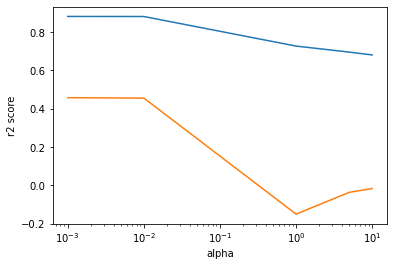

In [38]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [39]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8735823437732111
0.863390733754722


In [40]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.174),
 ('cars_trucks_and_buses_per_1000_persons', 0.004),
 ('coal_consumption_per_cap', 3.139),
 ('electricity_generation_per_person', 0.001),
 ('electricity_use_per_person', -0.0),
 ('forest_coverage_percent', -0.047),
 ('hydro_power_generation_per_person', -1.862),
 ('income_per_person_gdppercapita_ppp_inflation_adjusted', -0.0),
 ('industry_percent_of_gdp', 0.097),
 ('oil_consumption_per_cap', 2.689),
 ('yearly_co2_emissions_1000_tonnes', -0.0)]